## Final Project
#### Name: Peiyao Wu                
#### Class: ISGB-7943-003

## Problem 1: Analysis Report for Dataset births.xlsx

In [1]:
import datetime
import getpass
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(palette = "rainbow")
#Display fractuon with two decumal places but it does not round the number.
pd.set_option('display.precision', 2)

### 1.1 Read data 

In [2]:
births = pd.read_excel('births.xlsx')
births

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36
...,...,...,...,...,...
37532,2014,male,white non hispanic,yousef,18
37533,2014,male,white non hispanic,youssef,24
37534,2014,male,white non hispanic,yusuf,16
37535,2014,male,white non hispanic,zachary,90


In [3]:
#Check all attributes of the dataframe
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37537 entries, 0 to 37536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  37537 non-null  int64 
 1   gender      37537 non-null  object
 2   ethnicity   37537 non-null  object
 3   first_name  37537 non-null  object
 4   frequency   37537 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


### 1.2 According to the dataframe, there were 1273,006 babies reported born.

In [4]:
births.frequency.sum()

1273006

### 1.3 Of the babies reported born, <font color = red>558, 728 babies are female </font>  and <font color = red> 714, 278 babies </font> are male. A summarized chart for gender distribution is downbelow.

In [5]:
births.groupby('gender').frequency.sum()

gender
female    558728
male      714278
Name: frequency, dtype: int64

In [6]:
#births.gender.value_counts(normalize=False)

<AxesSubplot:title={'center':'Gender distribution on new-born babies in NYC'}, ylabel='frequency'>

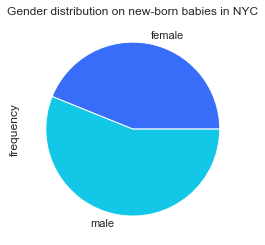

In [7]:
births.groupby('gender').frequency.sum().plot(kind="pie", title = 'Gender distribution on new-born babies in NYC')

### 1.4 The number of babies reported born based on each year
### Findings: 
### Between 2011 and 2017, the number of babies from 2011 to 2014 is not much different. However, started from 2015, the number of newborns fell sharply and remained low till 2017. 

In [8]:
births.groupby('birth_year')['frequency'].sum()

birth_year
2011    269829
2012    274122
2013    262686
2014    262634
2015     69600
2016     68740
2017     65395
Name: frequency, dtype: int64

<AxesSubplot:title={'center':'How many babies reported born in each year?'}, xlabel='birth_year'>

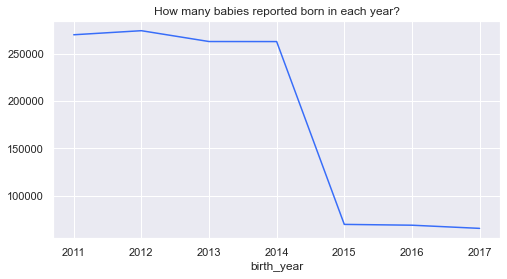

In [9]:
births.groupby('birth_year')['frequency'].sum().plot(figsize = (8,4), title = 'How many babies reported born in each year?')

### 1.5 The number of babies born regarding to ethnicity
### Findings: 
### Based on the pie chart, newborns are consisted of <font color = red> 7 ethnicities(actually are 4 ethnicites)</font>, the most two majority groups are <font color = red> hispanic with 425, 239</font> newborns and <font color = red>white non hispanic with 386, 688</font> newborns. Then black non hispanic and asian and pacific islander new borns are second tier. Besides, the ethnicity with the fewest newborns is black non hispanic.

In [10]:
births.groupby('ethnicity').frequency.sum().sort_values(ascending = False)

ethnicity
hispanic                      425239
white non hispanic            386688
black non hispanic            145804
asian and pacific islander    131935
white non hisp                103829
asian and paci                 40085
black non hisp                 39426
Name: frequency, dtype: int64

<AxesSubplot:title={'center':'Ethnicity distribution on new-born babies in NYC'}, ylabel='frequency'>

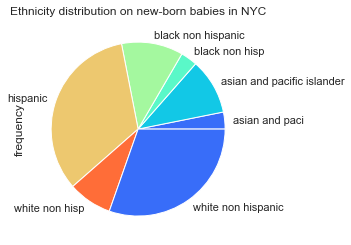

In [11]:
births.groupby('ethnicity').frequency.sum().plot(kind="pie", title = 'Ethnicity distribution on new-born babies in NYC')

### 1.6 The 10 most popular names in the dataset igorning gender, gender, year, ethnicity) are:
### Ethan, Jacob, Jayden, Daniel, Matthew, David, Michael, Sophia, Isabella, Aiden    

In [12]:
births.groupby('first_name').frequency.sum().sort_values(ascending = False).head(10)

first_name
ethan       12071
jacob       11762
jayden      11165
daniel      10035
matthew      9983
david        9920
michael      9796
sophia       9578
isabella     9291
aiden        9276
Name: frequency, dtype: int64

### 1.7 The 10 most popular female baby names in the dataset (ignoring gender, year, ethinicty) are:
### Sophia, Isabella, Emma, Olivia, Mia, Emily, Leah, Chloe, Madison, Ava

In [13]:
#Create a new data frame which only shows female newborns
female_filter = (births.gender == 'female')
female = births[female_filter]
female

,birth_year,gender,ethnicity,first_name,frequency
0,2011,female,hispanic,geraldine,13
1,2011,female,hispanic,gia,21
2,2011,female,hispanic,gianna,49
3,2011,female,hispanic,giselle,38
4,2011,female,hispanic,grace,36
...,...,...,...,...,...
36526,2014,female,white non hispanic,yocheved,28
36527,2014,female,white non hispanic,zelda,12
36528,2014,female,white non hispanic,zissy,25
36529,2014,female,white non hispanic,zoe,96


In [14]:
female1 = female.pivot_table(index = ['first_name', 'gender'], values = 'frequency', aggfunc = sum)
female1.sort_values(by='frequency', ascending=False).head(10)


,,frequency
first_name,gender,
sophia,female,9578
isabella,female,9291
emma,female,8581
olivia,female,8561
mia,female,8094
emily,female,7691
leah,female,6756
chloe,female,6201
madison,female,6161


### 1.8 The trend of first name 'David' in the given dataset
### Finding:
### Based on the second table downbelow, we can clearly see the David's claim was right that the trend of 'David' was going up from 2011 to 2013. However, the popularity of the name 'David' dropped sharply after 2014 whic is down to the amount of few hundreds people. 

In [15]:
#create a new data frame which only inclues newborns named as 'David' from 2014 to 2016
david_filter= (births.first_name == 'david')
david = births[david_filter]
david.drop(columns = ['first_name'])

,birth_year,gender,ethnicity,frequency
587,2011,male,asian and pacific islander,28
748,2011,male,black non hispanic,84
1720,2011,male,white non hispanic,258
2034,2011,male,asian and pacific islander,28
2195,2011,male,black non hispanic,84
...,...,...,...,...
35197,2013,male,white non hispanic,304
36588,2014,male,asian and pacific islander,30
36770,2014,male,black non hispanic,46
36965,2014,male,hispanic,167


In [16]:
david = david.pivot_table(index = ['birth_year'], values = 'frequency', aggfunc = sum)
david = david.sort_values(by='birth_year', ascending=True)
david.reset_index()

,birth_year,frequency
0,2011,2014
1,2012,2288
2,2013,2332
3,2014,1758
4,2015,545
5,2016,476
6,2017,507


<AxesSubplot:title={'center':"How many babies used the name 'David' in each year?"}, xlabel='birth_year'>

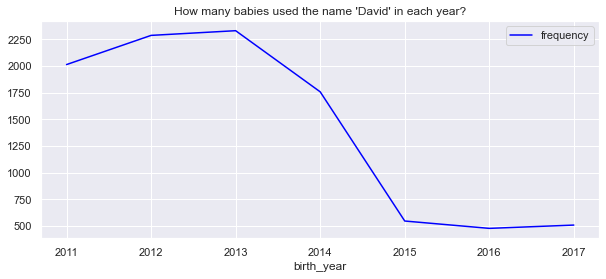

In [17]:
david.plot(figsize = (10,4), title = 'How many babies used the name \'David\' in each year?', color = 'blue')

### 1.9 There are 1832 distinct first names in dataset

In [18]:
births.first_name.nunique()

1832

### 1.10 There are 1011 distinct female names and 852 distinct male names.

In [19]:
#create a new data frame for male newborns
male_filter = (births.gender == 'male')
male = births[male_filter]
male

,birth_year,gender,ethnicity,first_name,frequency
545,2011,male,asian and pacific islander,aarav,15
546,2011,male,asian and pacific islander,aaron,51
547,2011,male,asian and pacific islander,abdul,20
548,2011,male,asian and pacific islander,abdullah,30
549,2011,male,asian and pacific islander,adam,28
...,...,...,...,...,...
37532,2014,male,white non hispanic,yousef,18
37533,2014,male,white non hispanic,youssef,24
37534,2014,male,white non hispanic,yusuf,16
37535,2014,male,white non hispanic,zachary,90


In [20]:
female.first_name.nunique()

1011

In [21]:
male.first_name.nunique()

852

### 1.11 Answer
### The answer to 1.9 is not consistent with 1.10. The number of distinct first names in the dataset is 1833, however, based on the question 1.10 and summed up the distinct male and female names, the total number of distinct names is 1863. The possibilty of this situation could be some female newborns and male newborns may be have the same name.

### 1.12 Total number of babie of each ethnicity born in each.
### Explaination for some cells in the table with no values: 
### There are some null values in the table downbelow, the reason is that when people recorded newborn babies in 2012, they used abbreviated catorical names which is different than the column names on other years' records. For example like instead of using asian and pacific islander, they used asian and paci; same as black non hisp and black non hispanic, etc. Because of this, for column 'asian and paci', 'balck non hisp', and 'white non hisp', they only have data for 2012. That also explains why 'asian and pacific islander', 'black non hispanic' and 'white non hispanic' column are missing values for 2012.

In [22]:
pd.crosstab(births.birth_year, births.ethnicity,values=births.frequency, aggfunc="sum", margins=True)

ethnicity,asian and paci,asian and pacific islander,black non hisp,black non hispanic,hispanic,white non hisp,white non hispanic,All
birth_year,,,,,,,,
2011,NaN,32217.0,NaN,42045.0,96743.0,NaN,98824.0,269829
2012,40085.0,NaN,39426.0,NaN,90782.0,103829.0,NaN,274122
2013,NaN,34760.0,NaN,38548.0,86585.0,NaN,102793.0,262686
2014,NaN,36536.0,NaN,37728.0,85529.0,NaN,102841.0,262634
2015,NaN,9584.0,NaN,9637.0,22813.0,NaN,27566.0,69600
2016,NaN,9973.0,NaN,9147.0,22086.0,NaN,27534.0,68740
2017,NaN,8865.0,NaN,8699.0,20701.0,NaN,27130.0,65395
All,40085.0,131935.0,39426.0,145804.0,425239.0,103829.0,386688.0,1273006


### 1.13 Regarding to the information from downbelow, the claim made by some socilogists is not right, from the result for 'difference', we can conclude that even the number of female newborn babies are less than femal babies all the time, but, the gap of newborn popularities between two genders is actually narrowed. 

In [52]:
gender_info = pd.crosstab(births.birth_year, births.gender,values=births.frequency, aggfunc="sum", margins=True)
gender_info

gender,female,male,All
birth_year,,,
2011,117700,152129,269829
2012,119406,154716,274122
2013,115183,147503,262686
2014,116590,146044,262634
2015,30592,39008,69600
2016,30360,38380,68740
2017,28897,36498,65395
All,558728,714278,1273006


In [53]:
difference = gender_info['female']-gender_info['male']
difference

birth_year
2011    -34429
2012    -35310
2013    -32320
2014    -29454
2015     -8416
2016     -8020
2017     -7601
All    -155550
dtype: int64

## Part 2. Analysis report of dataset house_prices.xlsx

In [54]:
#Read data
house_prices = pd.read_excel('house_prices.xlsx')
house_prices

,address,price,acres,size_sqft,age,rooms,baths,garages
0,9 Sycamore Road,466.00,0.23,2448,46,7,3.5,2
1,21 Jefferson St,364.00,0.22,1942,51,7,2.5,1
2,38 Hitching Post Lane,429.00,0.16,2073,29,5,3.0,2
3,4 Poppy Lane,548.40,0.46,2707,18,8,2.5,1
4,5 Daniel Drive,405.90,0.25,2042,46,7,1.5,1
5,15 Francis Terrace,374.10,0.23,2089,88,7,2.0,0
6,23 Guilfoy Street,315.00,0.18,1433,48,7,2.0,0
7,17 Carlyle Drive,749.74,0.50,2991,7,9,2.5,1
8,8 Craft Avenue,217.70,0.22,1008,52,5,1.0,0
9,22 Beechwood Ct.,635.70,0.13,3202,15,8,2.5,2


### 2.1 House prices in the community

### Summary of housing price:
### There are 30 houses in this communicty with a average housing price 389.85, and 75% houses' price are equalt to or lower than 438.52. The highest housing price is 749.74 and the lowest one is 217.70.

In [55]:
house_prices.price.describe()

count     30.00
mean     389.85
std      120.39
min      217.70
25%      314.33
50%      363.75
75%      438.52
max      749.74
Name: price, dtype: float64

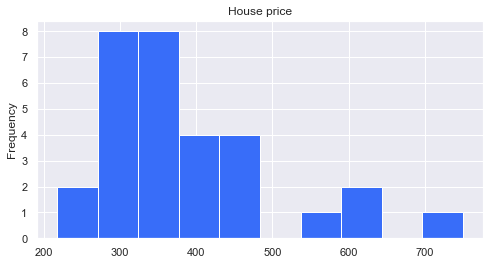

In [56]:
house_prices.price.plot(kind="hist", figsize= (8,4), title = "House price");

### 2.2 Variation in house prices based on the number of rooms
### Findings:
### With the same number of rooms, the biggest fluctuation of house price is housing price for house with 8 rooms then is house with 6 rooms. The most stable house price based on number of rooms is price for houses with 7 rooms. 

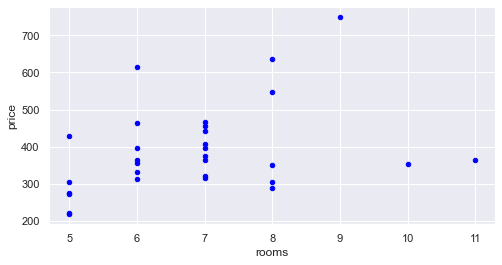

In [57]:
house_prices.plot(x="rooms", y = "price", kind="scatter", figsize=(8,4), color="blue" );

### 2.3 Relation between price other attributes of the house

### Findings:
### Among all the other attributes of the house, price and square feet of living space has the most strongest correlationship. The bigger house, the higher price. Besides, the property size in acres and the number of car garages in the house has the same strong influence on price which is 0.61. Surprisingly, the house price has a really low correlation with the number of rooms, which shows that even houses with many rooms, the house price may not affected by the number of rooms. 

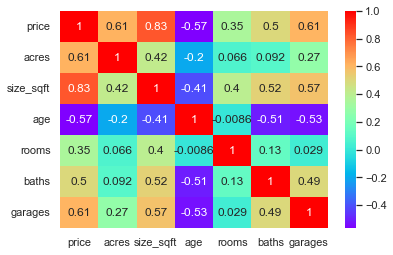

In [58]:
sns.heatmap(data= house_prices.corr(), annot = True, cmap = "rainbow");

In [59]:
import getpass
import datetime
print('\n\n\nFinished execution at ', datetime.datetime.now())
print(getpass.getuser())




Finished execution at  2021-12-13 05:30:49.222805
peiyaowu
